In [103]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

In [104]:
def load_train_imgs(path):
    classes = ['PNEUMONIA','NORMAL']
    imgs = []
    labels = []
    for i in classes:
        l2 = os.listdir(os.path.join(path,i))
        for j in l2:
            img = Image.open(os.path.join(path,i,j)).convert('RGB')
            img = img.resize(size=(32,32))
            imgs.append(np.array(img))
            labels.append(i)
            del img
    return labels,np.array(imgs)

In [105]:
y_train,x_train = load_train_imgs(r"D:\Deep Learning\Deep Learning - Datasets\Pneumonia X Ray\chest_xray\train")

In [106]:
x_train

array([[[[ 32,  32,  32],
         [ 58,  58,  58],
         [ 86,  86,  86],
         ...,
         [ 46,  46,  46],
         [ 33,  33,  33],
         [ 15,  15,  15]],

        [[ 37,  37,  37],
         [ 58,  58,  58],
         [102, 102, 102],
         ...,
         [ 48,  48,  48],
         [ 35,  35,  35],
         [ 18,  18,  18]],

        [[ 39,  39,  39],
         [ 59,  59,  59],
         [ 91,  91,  91],
         ...,
         [ 49,  49,  49],
         [ 36,  36,  36],
         [ 20,  20,  20]],

        ...,

        [[  5,   5,   5],
         [ 23,  23,  23],
         [ 82,  82,  82],
         ...,
         [  5,   5,   5],
         [ 14,  14,  14],
         [ 17,  17,  17]],

        [[  4,   4,   4],
         [ 24,  24,  24],
         [ 84,  84,  84],
         ...,
         [  5,   5,   5],
         [ 13,  13,  13],
         [ 16,  16,  16]],

        [[  4,   4,   4],
         [ 25,  25,  25],
         [ 84,  84,  84],
         ...,
         [  6,   6,   6],
        

In [107]:
y_train

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEU

In [108]:
model = Sequential([
    Conv2D(filters=64,kernel_size=3,input_shape=(32,32,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(filters=32,kernel_size=3,activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.25),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(2,activation='softmax'),
])

In [109]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 1152)              0         
                                                                 
 dense_21 (Dense)            (None, 128)              

In [110]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
Y_train = encode.fit_transform(y_train)

In [111]:
Y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [112]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [113]:
H = model.fit(x_train,Y_train,epochs=20,batch_size=16)

Epoch 1/20
326/326 [==============================] - 19s 23ms/step - loss: 0.8303 - accuracy: 0.7548
Epoch 2/20
326/326 [==============================] - 8s 23ms/step - loss: 0.5558 - accuracy: 0.7619
Epoch 3/20
326/326 [==============================] - 7s 23ms/step - loss: 0.5690 - accuracy: 0.7437
Epoch 4/20
326/326 [==============================] - 7s 22ms/step - loss: 0.5724 - accuracy: 0.7425
Epoch 5/20
326/326 [==============================] - 7s 22ms/step - loss: 0.5634 - accuracy: 0.7467
Epoch 6/20
326/326 [==============================] - 7s 22ms/step - loss: 0.5544 - accuracy: 0.7546
Epoch 7/20
326/326 [==============================] - 7s 23ms/step - loss: 0.5698 - accuracy: 0.7431
Epoch 8/20
326/326 [==============================] - 7s 23ms/step - loss: 0.5685 - accuracy: 0.7433
Epoch 9/20
326/326 [==============================] - 8s 23ms/step - loss: 0.5642 - accuracy: 0.7492
Epoch 10/20
326/326 [==============================] - 7s 21ms/step - loss: 0.5656 - accur

In [114]:
def load_test_imgs(path):
    classes = ['PNEUMONIA','NORMAL']
    imgs = []
    labels = []
    for i in classes:
        l2 = os.listdir(os.path.join(path,i))
        for j in l2:
            img = Image.open(os.path.join(path,i,j)).convert('RGB')
            img = img.resize(size=(32,32))
            imgs.append(np.array(img))
            labels.append(i)
            del img
    return labels,np.array(imgs)

In [115]:
y_test,x_test = load_test_imgs(r"D:\Deep Learning\Deep Learning - Datasets\Pneumonia X Ray\chest_xray\test")

In [116]:
x_test

array([[[[ 26,  26,  26],
         [ 47,  47,  47],
         [ 83,  83,  83],
         ...,
         [ 92,  92,  92],
         [103, 103, 103],
         [ 93,  93,  93]],

        [[ 23,  23,  23],
         [ 46,  46,  46],
         [ 57,  57,  57],
         ...,
         [ 97,  97,  97],
         [105, 105, 105],
         [ 86,  86,  86]],

        [[ 17,  17,  17],
         [ 45,  45,  45],
         [ 50,  50,  50],
         ...,
         [ 94,  94,  94],
         [ 96,  96,  96],
         [ 68,  68,  68]],

        ...,

        [[  0,   0,   0],
         [  6,   6,   6],
         [ 72,  72,  72],
         ...,
         [ 62,  62,  62],
         [  1,   1,   1],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  8,   8,   8],
         [ 66,  66,  66],
         ...,
         [ 61,  61,  61],
         [  4,   4,   4],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  9,   9,   9],
         [ 62,  62,  62],
         ...,
         [ 66,  66,  66],
        

In [117]:
y_test

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEU

In [118]:
y_test[0]

'PNEUMONIA'

20/20 [==============================] - 0s 16ms/step
1
NORMAL
PNEUMONIA Detected


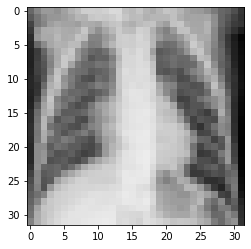

In [119]:
import random 

n = random.randint(0,500)
classes = ['PNEUMONIA','NORMAL']
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
output = np.argmax(predicted_value[n])
print(output)
print(classes[output])

if predicted_value[n][1] == 1:
    print("PNEUMONIA Detected")
elif predicted_value[n][0] > predicted_value[n][1]:
    print("No PNEUMONIA Detected")
else:
    print("PNEUMONIA Detected")

20/20 [==============================] - 0s 15ms/step
[0.77570176 0.22429828]
0
PNEUMONIA
No PNEUMONIA Detected


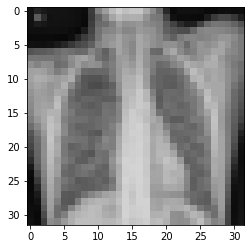

In [124]:
import random

n = random.randint(0,1000)
plt.imshow(x_test[n])

predicted_value = model.predict(x_test)
print(predicted_value[n])

output = np.argmax(predicted_value[n])
print(output)
print(classes[output])

if predicted_value[n][1] == 1:
    print("PNEUMONIA Detected")
elif predicted_value[n][0] > predicted_value[n][1]:
    print("No PNEUMONIA Detected")
else:
    print("PNEUMONIA Detected")
    